# **FOREST FIRE DETECTION USING KMEANS CLUSTERING**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline

In [2]:
df = pd.read_csv('forest.csv')
df.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_map)
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['day'] = df['day'].map(day_map)
print(df)

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      3    5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      3    5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      3    7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      8    7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8    7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8    7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3     11    2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [4]:
features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
X = df[features]
print("Selected Features (first 5 rows):")
print(X.head())

Selected Features (first 5 rows):
   X  Y  month  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [6]:
X = X.fillna(X.mean())
print("Feature matrix after filling missing values (first 5 rows):")
print(X.head())


Feature matrix after filling missing values (first 5 rows):
   X  Y  month  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features (first 5 rows):")
print(X_scaled_df.head())


Scaled Features (first 5 rows):
          X         Y     month      FFMC       DMC        DC       ISI  \
0  1.008313  0.569860 -1.968443 -0.805959 -1.323326 -1.830477 -0.860946   
1  1.008313 -0.244001  1.110120 -0.008102 -1.179541  0.488891 -0.509688   
2  1.008313 -0.244001  1.110120 -0.008102 -1.049822  0.560715 -0.509688   
3  1.440925  1.383722 -1.968443  0.191362 -1.212361 -1.898266 -0.004756   
4  1.440925  1.383722 -1.968443 -0.243833 -0.931043 -1.798600  0.126966   

       temp        RH      wind      rain     area  
0 -1.842640  0.411724  1.498614 -0.073268 -0.20202  
1 -0.153278 -0.692456 -1.741756 -0.073268 -0.20202  
2 -0.739383 -0.692456 -1.518282 -0.073268 -0.20202  
3 -1.825402  3.233519 -0.009834  0.603155 -0.20202  
4 -1.291012  3.356206 -1.238940 -0.073268 -0.20202  


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby('cluster').mean()
print("\nCluster Summary (Mean Values):")
print(cluster_summary[features])


Cluster Summary (Mean Values):
                X         Y     month       FFMC         DMC          DC  \
cluster                                                                    
0        4.229508  4.088525  8.380328  92.255410  124.816721  656.143279   
1        5.715596  4.733945  8.458716  90.556881  147.961468  660.971560   
2        4.864078  4.466019  3.757282  85.967961   30.331068  107.916505   

               ISI       temp         RH      wind      rain       area  
cluster                                                                  
0        10.363607  22.171803  37.121311  3.538689  0.000000  16.026393  
1         8.518349  16.079817  63.504587  4.714679  0.100917  10.863303  
2         5.580583  12.141748  45.174757  4.698058  0.001942   5.533010  


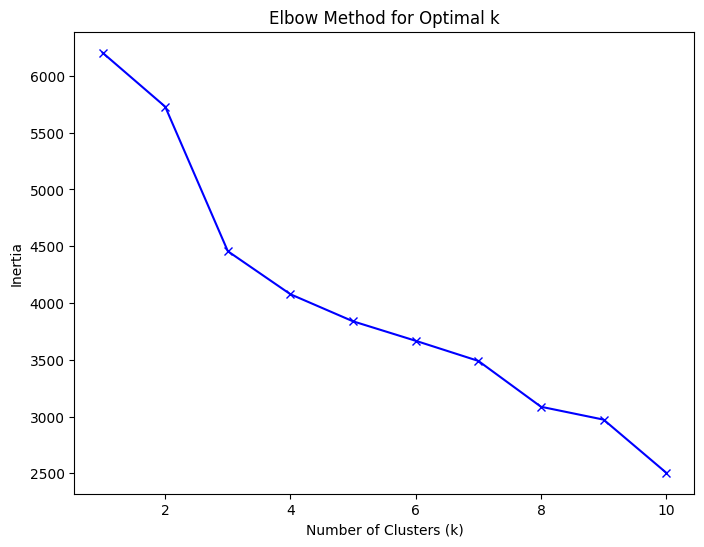

In [9]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

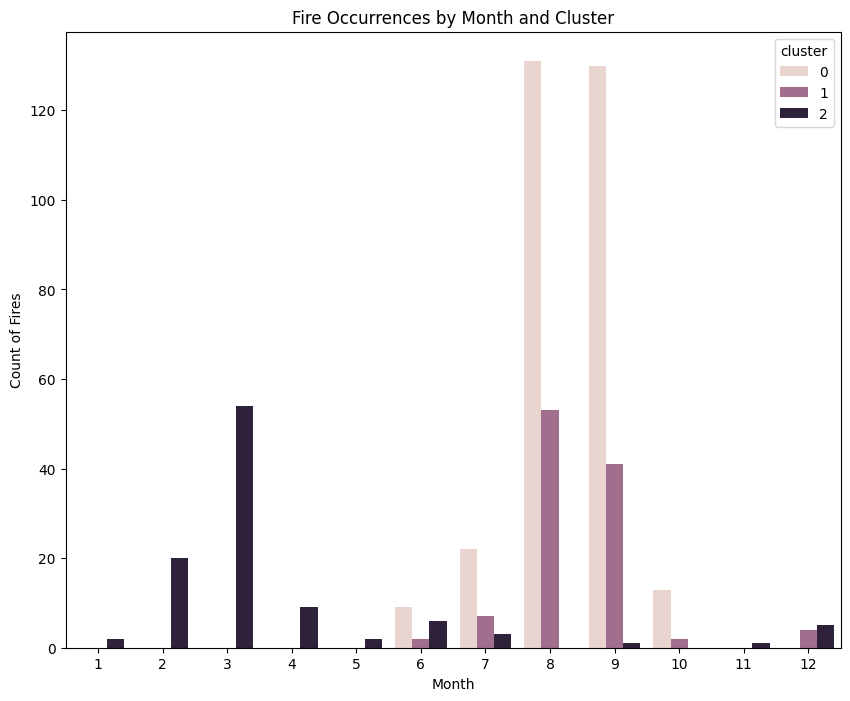

In [10]:
plt.figure(figsize=(10, 8))
sns.countplot(x='month', hue='cluster', data=df)
plt.xlabel('Month')
plt.ylabel('Count of Fires')
plt.title('Fire Occurrences by Month and Cluster')
plt.show()

In [13]:
# Taking user input for each feature
X_coord = float(input("Enter X coordinate (e.g., 5): "))
Y_coord = float(input("Enter Y coordinate (e.g., 6): "))
month = input("Enter month (e.g., jan, feb, mar, ..., dec): ").lower()

FFMC = float(input("Enter FFMC value (e.g., 92.4): "))
DMC = float(input("Enter DMC value (e.g., 117.9): "))
DC = float(input("Enter DC value (e.g., 668): "))
ISI = float(input("Enter ISI value (e.g., 12.2): "))
temp = float(input("Enter temperature (°C) (e.g., 19): "))
RH = float(input("Enter relative humidity (%) (e.g., 34): "))
wind = float(input("Enter wind speed (km/h) (e.g., 5.8): "))
rain = float(input("Enter rainfall (mm) (e.g., 0.05): "))
area = float(input("Enter burned area (ha) (e.g., 69.79): "))

try:
    # Validation
    if not (1 <= X_coord <= 9 and 1 <= Y_coord <= 9):
        raise ValueError("X and Y coordinates must be between 1 and 9.")
    if not (0 <= FFMC <= 100 and 0 <= DMC <= 300 and 0 <= DC <= 1000 and 0 <= ISI <= 50):
        raise ValueError("Fire indices out of realistic range.")
    if not (0 <= temp <= 40 and 0 <= RH <= 100 and 0 <= wind <= 20 and 0 <= rain <= 10):
        raise ValueError("Weather parameters out of realistic range.")
    if not (0 <= area <= 1000):
        raise ValueError("Area burned must be between 0 and 1000 ha.")

    # Map month to numerical value
    month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    month_num = month_map[month]

    # Create user input array
    user_input = [X_coord, Y_coord, month_num, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]

    # Scale input and predict cluster
    user_input_scaled = scaler.transform([user_input])
    cluster = kmeans.predict(user_input_scaled)[0]

    # Display results
    print(f"\nThe input fire instance belongs to Cluster {cluster}.")
    print("\nCharacteristics of this cluster (mean values):")
    print(cluster_summary.loc[cluster][features])

    # Interpretation of the cluster
    cluster_area = cluster_summary.loc[cluster]['area']
    if cluster_area > 50:
        print("This cluster represents high-severity fire hotspots (large burned area).")
    elif cluster_area > 10:
        print("This cluster represents moderate-severity fire hotspots.")
    else:
        print("This cluster represents low-severity or no-fire areas.")

except Exception as e:
    print("Error:", e)


Enter X coordinate (e.g., 5): 4
Enter Y coordinate (e.g., 6): 7
Enter month (e.g., jan, feb, mar, ..., dec): mar
Enter FFMC value (e.g., 92.4): 91.5
Enter DMC value (e.g., 117.9): 118.5
Enter DC value (e.g., 668): 667
Enter ISI value (e.g., 12.2): 11.5
Enter temperature (°C) (e.g., 19): 20
Enter relative humidity (%) (e.g., 34): 35
Enter wind speed (km/h) (e.g., 5.8): 5.9
Enter rainfall (mm) (e.g., 0.05): 0.04
Enter burned area (ha) (e.g., 69.79): 69.79

The input fire instance belongs to Cluster 0.

Characteristics of this cluster (mean values):
X          4.229508
Y          4.088525
month      8.380328
FFMC      92.255410
DMC      124.816721
DC       656.143279
ISI       10.363607
temp      22.171803
RH        37.121311
wind       3.538689
rain       0.000000
area      16.026393
Name: 0, dtype: float64
This cluster represents moderate-severity fire hotspots.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


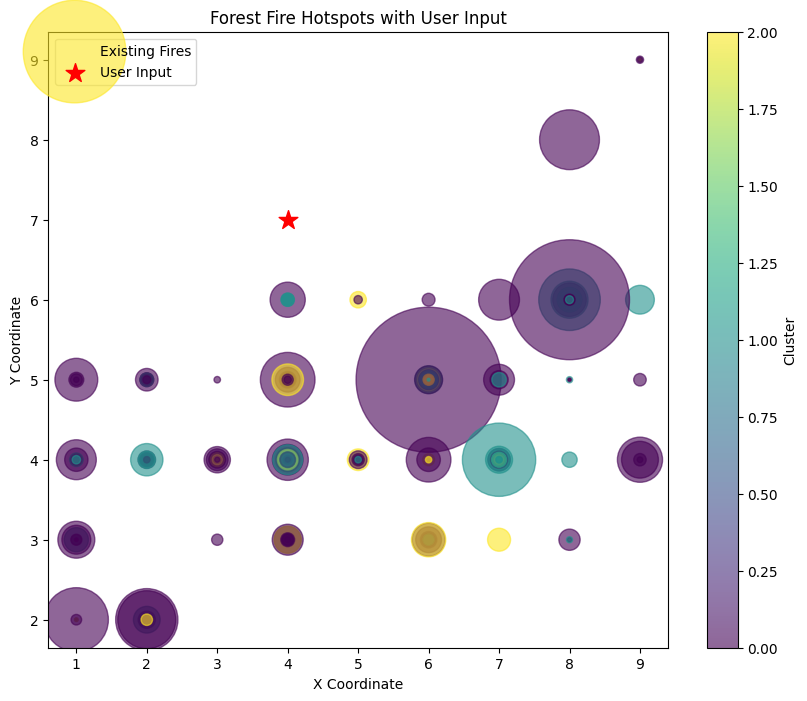

In [16]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['X'], df['Y'], c=df['cluster'], cmap='viridis',
                      s=df['area'] * 10, alpha=0.6, label='Existing Fires')
plt.scatter(X_coord, Y_coord, c='red', s=200, marker='*', label='User Input')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Forest Fire Hotspots with User Input')
plt.legend()
plt.show()


In [18]:
from google.colab import files

try:
    cluster_summary.to_csv('cluster_summary.csv')
    print("\nCluster summary saved as 'cluster_summary.csv'.")
    files.download('cluster_summary.csv')

except ValueError as e:
    print(f"Error: {e}")



Cluster summary saved as 'cluster_summary.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>